In [8]:
import os
# Find the latest version of spark 2.0  from http://www-us.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.0.0'
spark_version = 'spark-3.1.1'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www-us.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop2.7.tgz
!tar xf $SPARK_VERSION-bin-hadoop2.7.tgz
!pip install -q findspark

# Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop2.7"

# Start a SparkSession
import findspark
findspark.init()

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [9]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("BigData-Challenge").config("spark.driver.extraClassPath","/content/postgresql-42.2.16.jar").getOrCreate()

In [10]:
#1 Selected furniture data
from pyspark import SparkFiles
url = "https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Furniture_v1_00.tsv.gz"
spark.sparkContext.addFile(url)
df_furniture = spark.read.option("encoding", "UTF-8").csv(SparkFiles.get(""), sep="\t", header=True, inferSchema=True)
df_furniture.show()
print((df_furniture.count(), len(df_furniture.columns)))

+-----------+-----------+--------------+----------+--------------+--------------------+----------------+-----------+-------------+-----------+----+-----------------+--------------------+--------------------+-----------+
|marketplace|customer_id|     review_id|product_id|product_parent|       product_title|product_category|star_rating|helpful_votes|total_votes|vine|verified_purchase|     review_headline|         review_body|review_date|
+-----------+-----------+--------------+----------+--------------+--------------------+----------------+-----------+-------------+-----------+----+-----------------+--------------------+--------------------+-----------+
|         US|   24509695|R3VR960AHLFKDV|B004HB5E0E|     488241329|Shoal Creek Compu...|       Furniture|          4|            0|          0|   N|                Y|... desk is very ...|This desk is very...| 2015-08-31|
|         US|   34731776|R16LGVMFKIUT0G|B0042TNMMS|     205864445|Dorel Home Produc...|       Furniture|          5|    

In [11]:
#2 Selected personal care applianaces
url = "https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Personal_Care_Appliances_v1_00.tsv.gz"
spark.sparkContext.addFile(url)
df_personal_care = spark.read.option("encoding", "UTF-8").csv(SparkFiles.get(""), sep="\t", header=True, inferSchema=True)
print((df_personal_care.count(), len(df_personal_care.columns)))

(878094, 15)


In [12]:
#3 Selected office products
url = "https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Office_Products_v1_00.tsv.gz"
spark.sparkContext.addFile(url)
df_office = spark.read.option("encoding", "UTF-8").csv(SparkFiles.get(""), sep="\t", header=True, inferSchema=True)
print((df_office.count(), len(df_office.columns)))

(3520528, 15)


In [13]:
#4 Selected apparel products
url = "https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Apparel_v1_00.tsv.gz"
spark.sparkContext.addFile(url)
df_apparel = spark.read.option("encoding", "UTF-8").csv(SparkFiles.get(""), sep="\t", header=True, inferSchema=True)
print((df_apparel.count(), len(df_apparel.columns)))

(9426861, 15)


In [14]:
#5 Selected home products
url = "https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Home_v1_00.tsv.gz"
spark.sparkContext.addFile(url)
df_home = spark.read.option("encoding", "UTF-8").csv(SparkFiles.get(""), sep="\t", header=True, inferSchema=True)
print((df_home.count(), len(df_home.columns)))

(15648420, 15)


In [15]:
#6 Merge databases
from functools import reduce  # For Python 3.x
from pyspark.sql import DataFrame

def unionAll(*dfs):
    return reduce(DataFrame.unionAll, dfs)

df_merge = unionAll(df_furniture, df_personal_care, df_office, df_apparel, df_home)
df_merge.show()

print((df_merge.count(), len(df_merge.columns)))

+-----------+-----------+--------------+----------+--------------+--------------------+----------------+-----------+-------------+-----------+----+-----------------+--------------------+--------------------+-----------+
|marketplace|customer_id|     review_id|product_id|product_parent|       product_title|product_category|star_rating|helpful_votes|total_votes|vine|verified_purchase|     review_headline|         review_body|review_date|
+-----------+-----------+--------------+----------+--------------+--------------------+----------------+-----------+-------------+-----------+----+-----------------+--------------------+--------------------+-----------+
|         US|   24509695|R3VR960AHLFKDV|B004HB5E0E|     488241329|Shoal Creek Compu...|       Furniture|          4|            0|          0|   N|                Y|... desk is very ...|This desk is very...| 2015-08-31|
|         US|   34731776|R16LGVMFKIUT0G|B0042TNMMS|     205864445|Dorel Home Produc...|       Furniture|          5|    

In [16]:
#7 Only considering verified purchases
df_merge = df_merge.filter(df_merge.verified_purchase == "Y")

In [17]:
#8 Drop the non-beneficial columns
columns_to_drop = ["marketplace","review_id","product_parent","star_rating","helpful_votes","total_votes","vine","review_headline","review_body","verified_purchase"]

df_merge = df_merge.drop(*columns_to_drop)
df_merge.show()

print((df_merge.count(), len(df_merge.columns)))

+-----------+----------+--------------------+----------------+-----------+
|customer_id|product_id|       product_title|product_category|review_date|
+-----------+----------+--------------------+----------------+-----------+
|   24509695|B004HB5E0E|Shoal Creek Compu...|       Furniture| 2015-08-31|
|   34731776|B0042TNMMS|Dorel Home Produc...|       Furniture| 2015-08-31|
|    1272331|B0030MPBZ4|Bathroom Vanity T...|       Furniture| 2015-08-31|
|   45284262|B005G02ESA|Sleep Master Ulti...|       Furniture| 2015-08-31|
|   18311821|B00AVUQQGQ|Serta Bonded Leat...|       Furniture| 2015-08-31|
|   42943632|B00CFY20GQ|Prepac Shoe Stora...|       Furniture| 2015-08-31|
|   43157304|B00FKC48QA|HomCom PU Leather...|       Furniture| 2015-08-31|
|   51918480|B00N9IAL9K|  Folding Step Stool|       Furniture| 2015-08-31|
|   14522766|B001T4XU1C|Ace Bayou Adult V...|       Furniture| 2015-08-31|
|   43054112|B002HRFLBC|4D Concepts Audio...|       Furniture| 2015-08-31|
|   26622950|B006MISZOC|Z

In [18]:
#9 Get datatypes
df_merge.printSchema()

root
 |-- customer_id: integer (nullable = true)
 |-- product_id: string (nullable = true)
 |-- product_title: string (nullable = true)
 |-- product_category: string (nullable = true)
 |-- review_date: string (nullable = true)



In [19]:
#10 Convert date from string to datetime
from pyspark.sql.types import *
df_merge = df_merge.withColumn("review_date", df_merge["review_date"].cast(DateType()))

df_merge.printSchema()
df_merge.show()

root
 |-- customer_id: integer (nullable = true)
 |-- product_id: string (nullable = true)
 |-- product_title: string (nullable = true)
 |-- product_category: string (nullable = true)
 |-- review_date: date (nullable = true)

+-----------+----------+--------------------+----------------+-----------+
|customer_id|product_id|       product_title|product_category|review_date|
+-----------+----------+--------------------+----------------+-----------+
|   24509695|B004HB5E0E|Shoal Creek Compu...|       Furniture| 2015-08-31|
|   34731776|B0042TNMMS|Dorel Home Produc...|       Furniture| 2015-08-31|
|    1272331|B0030MPBZ4|Bathroom Vanity T...|       Furniture| 2015-08-31|
|   45284262|B005G02ESA|Sleep Master Ulti...|       Furniture| 2015-08-31|
|   18311821|B00AVUQQGQ|Serta Bonded Leat...|       Furniture| 2015-08-31|
|   42943632|B00CFY20GQ|Prepac Shoe Stora...|       Furniture| 2015-08-31|
|   43157304|B00FKC48QA|HomCom PU Leather...|       Furniture| 2015-08-31|
|   51918480|B00N9IAL9K|

In [20]:
#10 Create column with year
from pyspark.sql.functions import year
from pyspark.sql.functions import to_date
 
df_merge = df_merge.withColumn("review_year",year(df_merge.review_date))
df_merge.show()

+-----------+----------+--------------------+----------------+-----------+-----------+
|customer_id|product_id|       product_title|product_category|review_date|review_year|
+-----------+----------+--------------------+----------------+-----------+-----------+
|   24509695|B004HB5E0E|Shoal Creek Compu...|       Furniture| 2015-08-31|       2015|
|   34731776|B0042TNMMS|Dorel Home Produc...|       Furniture| 2015-08-31|       2015|
|    1272331|B0030MPBZ4|Bathroom Vanity T...|       Furniture| 2015-08-31|       2015|
|   45284262|B005G02ESA|Sleep Master Ulti...|       Furniture| 2015-08-31|       2015|
|   18311821|B00AVUQQGQ|Serta Bonded Leat...|       Furniture| 2015-08-31|       2015|
|   42943632|B00CFY20GQ|Prepac Shoe Stora...|       Furniture| 2015-08-31|       2015|
|   43157304|B00FKC48QA|HomCom PU Leather...|       Furniture| 2015-08-31|       2015|
|   51918480|B00N9IAL9K|  Folding Step Stool|       Furniture| 2015-08-31|       2015|
|   14522766|B001T4XU1C|Ace Bayou Adult V..

In [21]:
#11 Create a table to count data rows per year
row_year_table = df_merge.groupby("review_year").agg({"review_year":"count"}).withColumnRenamed("count(review_year)", "year_count")
row_year_table.sort(row_year_table.review_year.desc()).show(truncate=False)

+-----------+----------+
|review_year|year_count|
+-----------+----------+
|2015       |10159789  |
|2014       |8613535   |
|2013       |4717096   |
|2012       |1616030   |
|2011       |808013    |
|2010       |442625    |
|2009       |198524    |
|2008       |103916    |
|2007       |77769     |
|2006       |20737     |
|2005       |10626     |
|2004       |5216      |
|2003       |5299      |
|2002       |3468      |
|2001       |2736      |
|2000       |1462      |
|1999       |123       |
|null       |0         |
+-----------+----------+



In [22]:
#12 Only considering 2010 data for week 1
df_merge = df_merge.filter(df_merge.review_year == "2010")
print((df_merge.count(), len(df_merge.columns)))

(442625, 6)


In [23]:
#13 Create table with customer_IDs and products bought (as  row)
# This method didn't work, there's a limit of 10,000 distinct values in pyspark

# summary_table = df_merge.groupby("customer_id").pivot("product_id").count()
# summary_table.show()

In [24]:
#14 Convert Pyspark dataframe into panda df
df_week1 = df_merge.toPandas()

In [25]:
#15 Save file in my drive
from google.colab import drive
drive.mount('drive')

df_week1.to_csv('data.csv')
!cp data.csv "drive/My Drive/"

KeyboardInterrupt: ignored

In [31]:
df_week1["Quantity"] = 1
df_week1

,customer_id,product_id,product_title,product_category,review_date,review_year,Quantity
0,13682848,Other,ORE International Black 4 Panel Plum Blossom S...,Furniture,2010-12-31,2010,1
1,52516035,Other,"Winsome Wood Portland Umbrella Stand, Cappuccina",Furniture,2010-12-31,2010,1
2,19360779,Other,Tenley Occasional Table Set,Furniture,2010-12-31,2010,1
3,11362249,B000IHJF60,Tot Tutors WO697 Friends Collection Kids Book ...,Furniture,2010-12-31,2010,1
4,40561072,Other,ITALMODERN Veronica Monitor Cart; Orange,Furniture,2010-12-31,2010,1
...,...,...,...,...,...,...,...
442620,14371548,Other,Braun Oral-B Sonic Complete Replacement Brushe...,Personal_Care_Appliances,2010-01-01,2010,1
442621,14812612,Other,Walker or Wheelchair Bag,Personal_Care_Appliances,2010-01-01,2010,1
442622,13572974,Other,Exergen temporal thermometer,Personal_Care_Appliances,2010-01-01,2010,1
442623,14395064,Other,Snore Stopper - Self-Adhesive Electrodes (1 pa...,Personal_Care_Appliances,2010-01-01,2010,1


In [33]:
#17 Too many products to create table
product_counts = df_week1.product_id.value_counts()
product_counts

Other         367366
B002GP7Z6Y      1242
B002O3W4LE       870
B0032AN4M6       780
B001VD5E3S       606
               ...  
B000GLNO3S        50
B002C0EDYU        50
B002NF61TE        50
B0012AQLAK        50
B0019QGVIO        50
Name: product_id, Length: 699, dtype: int64

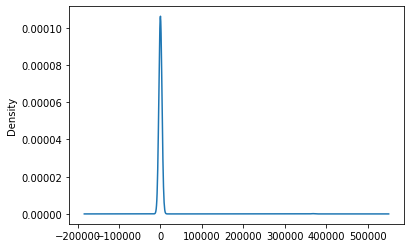

In [34]:
#18 Visualize the value counts
product_counts.plot.density()

In [35]:
#19 Determine which values to replace
replace_product = list(product_counts[product_counts < 50].index)

# Replace in DataFrame
for product in replace_product:
    df_week1.product_id = df_week1.product_id.replace(product,"Other")

# Check to make sure binning was successful
df_week1.product_id.value_counts()

Other         367366
B002GP7Z6Y      1242
B002O3W4LE       870
B0032AN4M6       780
B001VD5E3S       606
               ...  
B000GLNO3S        50
B002C0EDYU        50
B002NF61TE        50
B0012AQLAK        50
B0019QGVIO        50
Name: product_id, Length: 699, dtype: int64

In [36]:
#20 Drop rows of product_ids where total count is lower than 50
df_simplified = df_week1[df_week1.product_id != "Other"]
df_simplified

,customer_id,product_id,product_title,product_category,review_date,review_year,Quantity
3,11362249,B000IHJF60,Tot Tutors WO697 Friends Collection Kids Book ...,Furniture,2010-12-31,2010,1
11,45402464,B001AX898G,Homz Square-Shaped Faux-Leather Storage Ottoman,Furniture,2010-12-31,2010,1
12,20255829,B002YD8E5O,Convenience Concepts Sheridan Faux Leather Sto...,Furniture,2010-12-31,2010,1
14,53086796,B001T4XTVS,Ace Bayou Medium Standard Vinyl Bean Bag Chair,Furniture,2010-12-31,2010,1
27,30620418,B000QS5PEW,CARVED-TOP ACCENT TABLE,Furniture,2010-12-31,2010,1
...,...,...,...,...,...,...,...
442587,45455621,B0025RDKA8,"Nonin Go2 Achieve Fingertip Pulse Oximeter, Blue",Personal_Care_Appliances,2010-01-05,2010,1
442592,32396682,B000F9728Y,Tingting Head Tuner,Personal_Care_Appliances,2010-01-05,2010,1
442594,26776628,B001AHMN34,Sunlight 365 LED Mood Enhancing Light,Personal_Care_Appliances,2010-01-04,2010,1
442613,37373357,B0010DS8X2,Oral-B Professional Care 3000 Electric Power T...,Personal_Care_Appliances,2010-01-02,2010,1


In [37]:
#21 Consolidate the items into 1 transaction per row with each product
apriori_table = df_simplified.groupby(["customer_id","product_id"])["Quantity"].sum().unstack().reset_index().fillna(0).set_index("customer_id")
apriori_table

product_id,B00000JZKB,B00000K13A,B00001N2QU,B00004T1XK,B00004Z5QI,B000050FZP,B00005ATSO,B00005AWBJ,B00005UKAX,B0000635WI,B000067PTO,B00006B80P,B00006B8HT,B00006I58N,B00006ICZB,B00006IEDY,B00006IEI2,B00006IEI4,B00006IV33,B00006L385,B00007AKDL,B00007M1TZ,B00008UI0R,B00008XETL,B000090WE9,B00009R66F,B00009RAVO,B00009V332,B00009WCBU,B0000APHTD,B0000C120T,B0000CBK1L,B0000DF0RB,B0000UIXRM,B0000VYDKM,B0000YS93Q,B00016BYHQ,B0001EMLZ2,B0001EMLZW,B0001EMM0G,...,B0036TGGJ6,B0036TGGJG,B0036TGGVO,B0036TGGW8,B0037JK1V4,B00387E5BM,B0038FWRXC,B003990GMQ,B0039XRJ5Y,B0039XRJ68,B003A0H38E,B003ADACP2,B003B42ZBE,B003BNY7PM,B003CYKBAU,B003E1S2K2,B003EK7O1G,B003G2OVCC,B003GUTG06,B003H92LSA,B003I4FC80,B003JME93K,B003JQLHEA,B003JYGBCK,B003KGBCZS,B003L4O8D2,B003SHZ27S,B003UBPB6E,B003UFEGW0,B003UI5B8A,B003VQHQ8E,B003VQHSJG,B003VQR1RA,B003VQR1S4,B003VQR1UC,B003WE8TRC,B003WL7R6Y,B003YCOJAS,B003YHD1FW,B003YL412U
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9873698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9874628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9875027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9875419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9877002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53095559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53095900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53096155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#22 Save file in my drive
from google.colab import  drive
drive.mount('/drive', force_remount=True)
apriori_table.to_csv('/drive/My Drive/Apriori/apriori_table.csv')

#drive.mount("drive", force_remount=True)
#apriori_table.to_csv('apriori_table.csv')
#!cp data.csv "drive/My Drive/"

In [42]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [43]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
apriori_cleaned = apriori_table.applymap(encode_units)
apriori_cleaned

product_id,B00000JZKB,B00000K13A,B00001N2QU,B00004T1XK,B00004Z5QI,B000050FZP,B00005ATSO,B00005AWBJ,B00005UKAX,B0000635WI,B000067PTO,B00006B80P,B00006B8HT,B00006I58N,B00006ICZB,B00006IEDY,B00006IEI2,B00006IEI4,B00006IV33,B00006L385,B00007AKDL,B00007M1TZ,B00008UI0R,B00008XETL,B000090WE9,B00009R66F,B00009RAVO,B00009V332,B00009WCBU,B0000APHTD,B0000C120T,B0000CBK1L,B0000DF0RB,B0000UIXRM,B0000VYDKM,B0000YS93Q,B00016BYHQ,B0001EMLZ2,B0001EMLZW,B0001EMM0G,...,B0036TGGJ6,B0036TGGJG,B0036TGGVO,B0036TGGW8,B0037JK1V4,B00387E5BM,B0038FWRXC,B003990GMQ,B0039XRJ5Y,B0039XRJ68,B003A0H38E,B003ADACP2,B003B42ZBE,B003BNY7PM,B003CYKBAU,B003E1S2K2,B003EK7O1G,B003G2OVCC,B003GUTG06,B003H92LSA,B003I4FC80,B003JME93K,B003JQLHEA,B003JYGBCK,B003KGBCZS,B003L4O8D2,B003SHZ27S,B003UBPB6E,B003UFEGW0,B003UI5B8A,B003VQHQ8E,B003VQHSJG,B003VQR1RA,B003VQR1S4,B003VQR1UC,B003WE8TRC,B003WL7R6Y,B003YCOJAS,B003YHD1FW,B003YL412U
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9873698,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9874628,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9875027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9875419,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9877002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53095559,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
53095900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
53096155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
item_association = apriori(apriori_cleaned, min_support=0.001, use_colnames=True)
item_association

,support,itemsets
0,0.001053,(B00000JZKB)
1,0.001650,(B00001N2QU)
2,0.001264,(B000050FZP)
3,0.001018,(B00005UKAX)
4,0.003125,(B0000635WI)
...,...,...
305,0.002388,(B003UBPB6E)
306,0.001931,(B003VQHQ8E)
307,0.001931,(B003VQR1RA)
308,0.001264,(B003VQR1UC)


In [59]:
apriori_rules = association_rules(item_association, metric="lift", min_threshold=1)
apriori_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
